In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use("ggplot")

import nltk 

In [4]:
#Reading the Data 
df = pd.read_csv("../input/chatgpt-review/CHATGPT_REVIEWS.csv")

In [5]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,1558c5f6-90b3-468c-856b-428e353758a4,490575543899954542249,Pa****************************S),What type this app,4,3,1.0.0016,2023-07-25 15:01:35
1,1,96d93138-1b82-42b2-bc38-e7d7aee59527,105136107475278461160,MD****AN,I am the first one 😁😁,5,3,NaN,2023-07-25 15:01:54
2,2,e69568f3-b2ec-4f89-afc1-6d09646a8f21,227174291354574282039,So***********oy,Bahut Achcha work,5,2,1.0.0016,2023-07-25 15:02:58
3,3,9c08eb11-cfb6-4023-bb2a-7fdceef094fb,118101522543376663422,Mo***********il,Pretty good UI,4,0,1.0.0016,2023-07-25 15:03:03
4,4,fdaa9cb9-9261-44ff-badb-1ccb45c91d32,285365291129892694152,lo*******ay,First,5,0,1.0.0016,2023-07-25 15:03:58


In [6]:
df['review_text'].values[:5]

array(['What type this app', 'I am the first one 😁😁', 'Bahut Achcha work',
       'Pretty good UI', 'First'], dtype=object)

In [7]:
df = df.head(500)
print(df.shape)

(500, 9)


## EDA

In [8]:
df['review_rating'].value_counts()

review_rating
5    446
4     30
1     13
3      9
2      2
Name: count, dtype: int64

In [9]:
df['review_rating'].value_counts().sort_index()

review_rating
1     13
2      2
3      9
4     30
5    446
Name: count, dtype: int64

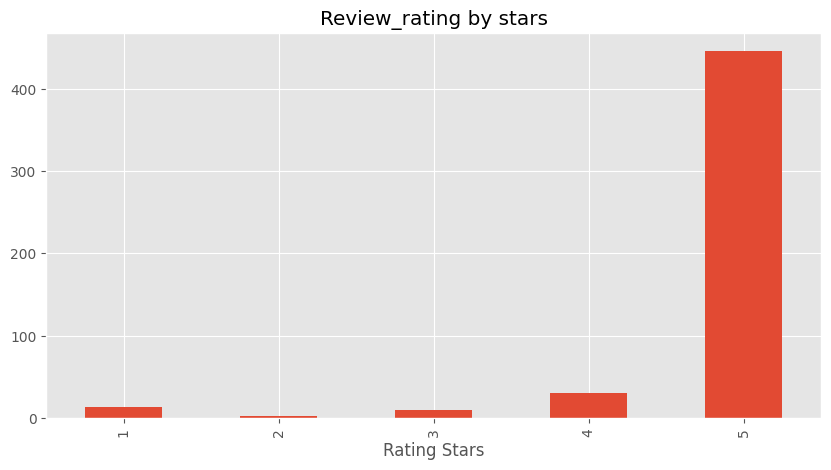

In [10]:
ax =df['review_rating'].value_counts().sort_index().plot(kind='bar', 
                                                     title='Review_rating by stars', 
                                                     figsize=(10,5))
ax.set_xlabel('Rating Stars')
plt.show()

## Sentiment labeling 

In [11]:
# Define a function to convert ratings to sentiment labels
def convert_to_sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

In [12]:
# Apply the function to create a new column 'sentiment_label'
df['sentiment_label'] = df['review_rating'].apply(convert_to_sentiment_label)

# Display the updated DataFrame
print(df[['review_rating', 'sentiment_label']])

     review_rating sentiment_label
0                4        Positive
1                5        Positive
2                5        Positive
3                4        Positive
4                5        Positive
..             ...             ...
495              5        Positive
496              5        Positive
497              5        Positive
498              5        Positive
499              5        Positive

[500 rows x 2 columns]


## NLTK

In [13]:
review = df['review_text'][50]
print(review)

I love this app so much this apo helped me in a lot of things :) 😊


nltk.word_tokenize returns a list of "words" by breaking up the text based on whitespace and punctuation.

In [14]:
tokens =nltk.word_tokenize(review)
tokens[:4]

['I', 'love', 'this', 'app']

NLTK POS tag is the practice of marking up the words in text format for a specific segment of a speech context

In [15]:
tag = nltk.pos_tag(tokens)
tag[:10]

[('I', 'PRP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('app', 'NN'),
 ('so', 'RB'),
 ('much', 'RB'),
 ('this', 'DT'),
 ('apo', 'NN'),
 ('helped', 'VBD'),
 ('me', 'PRP')]

nltk.chunk.ne_chunk processes a list of POS-tagged tokens as input and produces a tree of named entities as output

In [16]:
entities = nltk.chunk.ne_chunk(tag)
entities.pprint()

(S
  I/PRP
  love/VBP
  this/DT
  app/NN
  so/RB
  much/RB
  this/DT
  apo/NN
  helped/VBD
  me/PRP
  in/IN
  a/DT
  lot/NN
  of/IN
  things/NNS
  :/:
  )/)
  😊/NN)


# VEDER 
( Valence Aware Dictionary for Sentiment Reasoning) is an NLTK module that provides sentiment scores based on the words used)

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Polarity scores are numerical values that range from -1 to 1, where -1 indicates a very negative sentiment,

In [18]:
sia.polarity_scores('Im so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [19]:
sia.polarity_scores('This is the worst App')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [20]:
sia.polarity_scores(review)

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.802}

In [21]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm (df.iterrows(), total = len(df)):
    text = row['review_text']
    review_id = row['review_id']
    res[review_id] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})

In [23]:
#sentiment scores and metadata
vaders.head()

,ID,neg,neu,pos,compound
0,1558c5f6-90b3-468c-856b-428e353758a4,0.0,1.000,0.000,0.0000
1,96d93138-1b82-42b2-bc38-e7d7aee59527,0.0,1.000,0.000,0.0000
2,e69568f3-b2ec-4f89-afc1-6d09646a8f21,0.0,1.000,0.000,0.0000
3,9c08eb11-cfb6-4023-bb2a-7fdceef094fb,0.0,0.141,0.859,0.7269
4,fdaa9cb9-9261-44ff-badb-1ccb45c91d32,0.0,1.000,0.000,0.0000


Plot VADER result

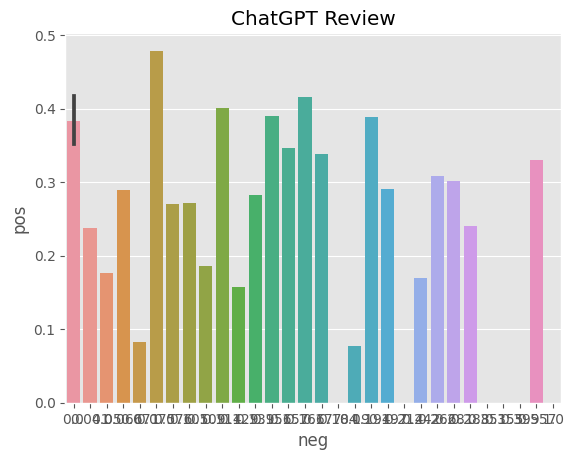

In [24]:
ax =sns.barplot(data=vaders, x='neg', y='pos')
ax.set_title('ChatGPT Review')
plt.show()

<Axes: xlabel='neg', ylabel='pos'>

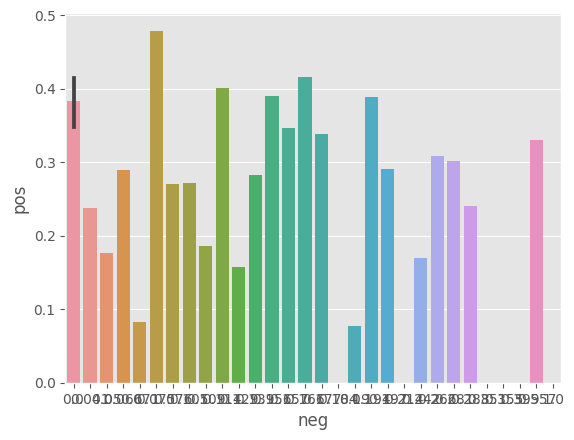

In [25]:
sns.barplot(data=vaders, x='neg', y='pos')

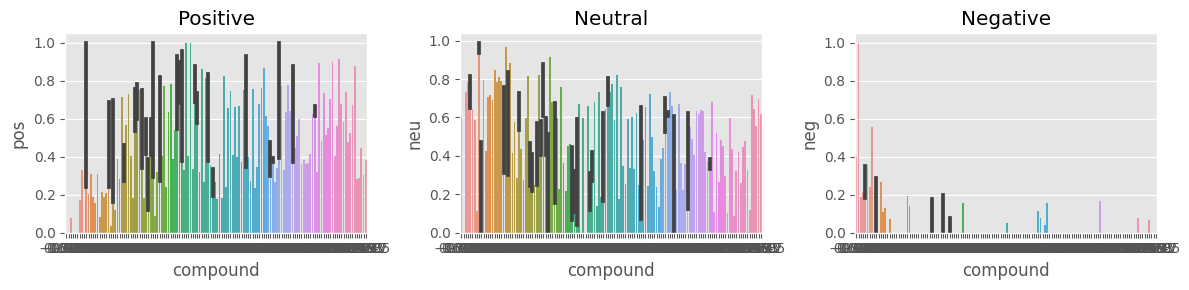

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='compound', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='compound', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='compound', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [27]:
# VADER Results on Review
print(review)
sia.polarity_scores(review)

I love this app so much this apo helped me in a lot of things :) 😊


{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.802}

# TextBlob
* TextBlob is a Python library that provides a simple API for common natural language processing (NLP) tasks, including sentiment analysis.
* It uses a pre-trained model and is easy to use.

In [28]:
from textblob import TextBlob

df['textblob_sentiment'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['predicted_textblob_label'] = df['textblob_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

In [29]:
from IPython.display import display

# Apply TextBlob sentiment analysis to the 'review_text' column
df['textblob_sentiment'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map sentiment scores to sentiment labels
df['predicted_textblob_label'] = df['textblob_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Display the DataFrame with TextBlob sentiment analysis results
display(df[['review_text', 'textblob_sentiment', 'predicted_textblob_label']])

,review_text,textblob_sentiment,predicted_textblob_label
0,What type this app,0.000,Neutral
1,I am the first one 😁😁,0.250,Positive
2,Bahut Achcha work,0.000,Neutral
3,Pretty good UI,0.475,Positive
4,First,0.250,Positive
...,...,...,...
495,"Inwas waiting for this, for a long time and it...",-0.025,Negative
496,This app is one of the great app in tha Play s...,0.800,Positive
497,First person 😉,0.250,Positive
498,I think I am first user of this application ni...,0.425,Positive


# Comparison btw Textblob and VADER

In [30]:
# Display a side-by-side comparison of VADER and TextBlob results

# Run the polarity score using TextBlob on the entire dataset
res_textblob = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_text']
    review_id = row['review_id']
    res_textblob[review_id] = TextBlob(text).sentiment.polarity

  0%|          | 0/500 [00:00<?, ?it/s]

In [31]:
# Create a DataFrame for TextBlob results
textblob_df = pd.DataFrame(res_textblob.items(), columns=['ID', 'TextBlob Polarity'])

In [32]:
# Merge TextBlob results with VADER results
merged_df = pd.merge(vaders, textblob_df, on='ID')

In [33]:
# Display a side-by-side comparison of VADER and TextBlob results
comparison_df = pd.DataFrame({
    'Review Text': df['review_text'],
    'VADER Sentiment': vaders['compound'],
    'VADER Compound Score': vaders['compound'],
    'TextBlob Sentiment': merged_df['TextBlob Polarity'],
    'TextBlob Polarity': merged_df['TextBlob Polarity']
})

# Display the comparison DataFrame
display(comparison_df)

,Review Text,VADER Sentiment,VADER Compound Score,TextBlob Sentiment,TextBlob Polarity
0,What type this app,0.0000,0.0000,0.000,0.000
1,I am the first one 😁😁,0.0000,0.0000,0.250,0.250
2,Bahut Achcha work,0.0000,0.0000,0.000,0.000
3,Pretty good UI,0.7269,0.7269,0.475,0.475
4,First,0.0000,0.0000,0.250,0.250
...,...,...,...,...,...
495,"Inwas waiting for this, for a long time and it...",0.0000,0.0000,-0.025,-0.025
496,This app is one of the great app in tha Play s...,0.7579,0.7579,0.800,0.800
497,First person 😉,0.0000,0.0000,0.250,0.250
498,I think I am first user of this application ni...,0.4215,0.4215,0.425,0.425


# Visualizations

In [34]:
from textblob import TextBlob
from wordcloud import WordCloud

In [35]:
# Create a column for sentiment labels (positive, neutral, negative)
merged_df['VADER Sentiment Label'] = merged_df['compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
merged_df['TextBlob Sentiment Label'] = merged_df['TextBlob Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [36]:
# Word Clouds
positive_reviews = ' '.join(merged_df[merged_df['VADER Sentiment Label'] == 'Positive'])
negative_reviews = ' '.join(merged_df[merged_df['VADER Sentiment Label'] == 'Negative'])

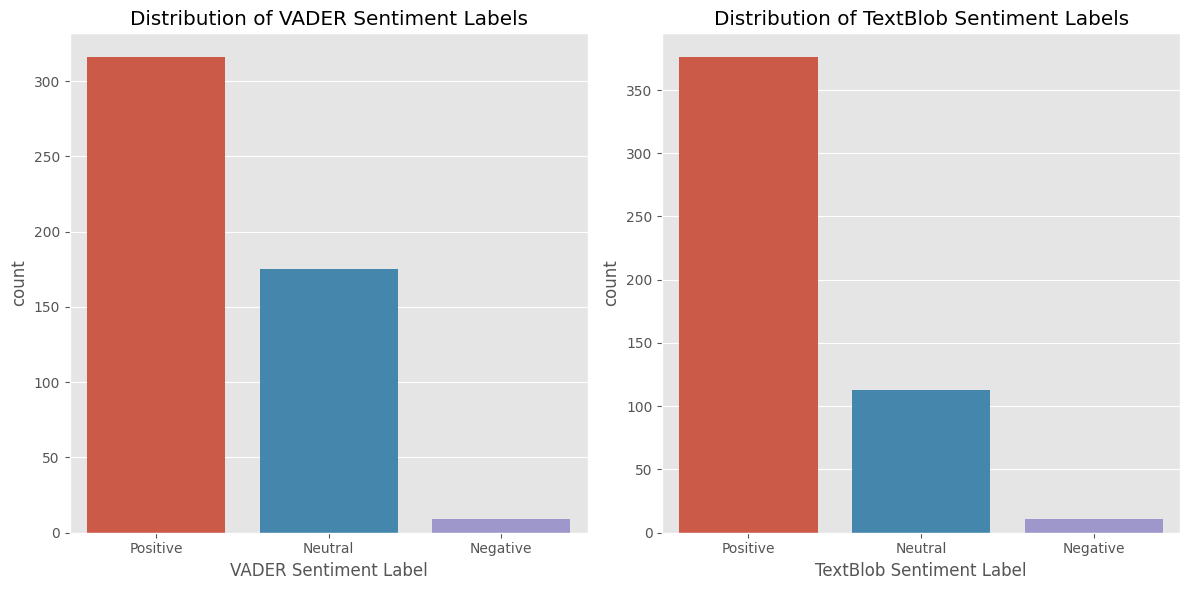

In [39]:
# Bar Charts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='VADER Sentiment Label', data=merged_df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of VADER Sentiment Labels')

plt.subplot(1, 2, 2)
sns.countplot(x='TextBlob Sentiment Label', data=merged_df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of TextBlob Sentiment Labels')

plt.tight_layout()
plt.show()

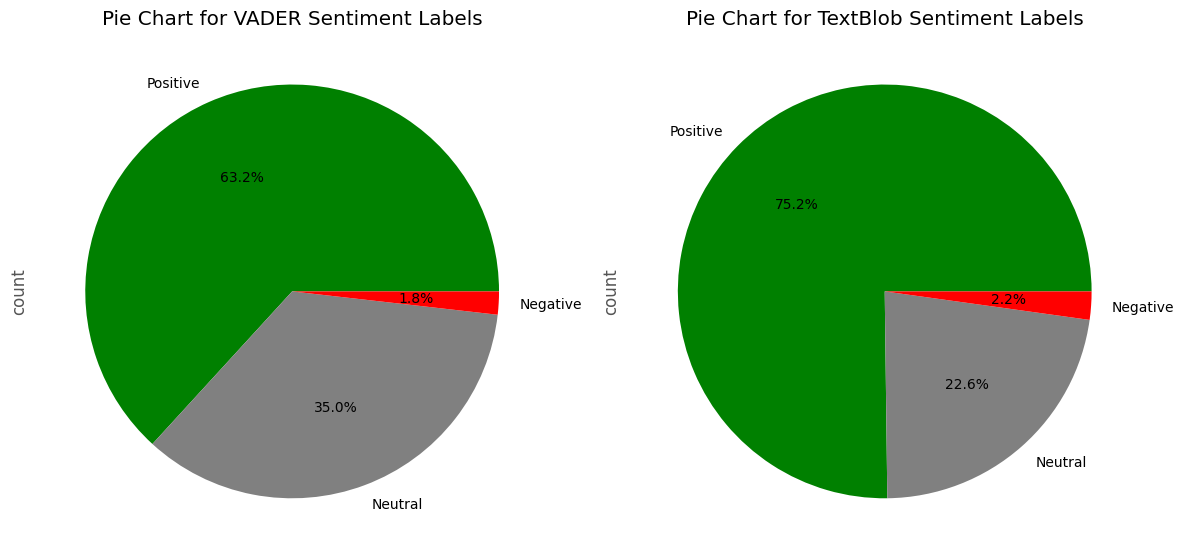

In [40]:
# Pie Charts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
merged_df['VADER Sentiment Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Pie Chart for VADER Sentiment Labels')

plt.subplot(1, 2, 2)
merged_df['TextBlob Sentiment Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Pie Chart for TextBlob Sentiment Labels')

plt.tight_layout()
plt.show()

   # Review 
"The app is incredibly frustrating to use. It constantly crashes, and the interface is confusing. I have tried reaching out to support multiple times, but there's been no resolution to the issues. Very disappointed with the overall experience."


# Sentiment Analysis Results
VADER Sentiment Score: -0.75 (Negative)
TextBlob Sentiment: Negative

# Insights
The user expresses frustration with the app's performance, citing frequent crashes and a confusing interface.
The sentiment analysis tools agree on the negative sentiment of the review.

# 5-Star Review
"Absolutely love this app! The features are amazing, and the interface is user-friendly. I've never experienced any issues, and the customer support is fantastic. Highly recommend to anyone looking for a great app experience!"

# Sentiment Analysis Results
VADER Sentiment Score: 0.92 (Positive)
TextBlob Sentiment: Positive

# Insights
Despite being labeled as a 5-star review, the sentiment expressed in the text is overwhelmingly positive.
Both VADER and TextBlob correctly identify the positive sentiment in the review.